In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import graphviz

from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix

In [2]:
data_link = 'C:\\Users\\Alienware\\Documents\\Machine Learning\\Group Project\\data\\Phishing\\phishing_final.csv'
phisihingData = pd.read_csv(data_link)
phisihingData

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,Yes,Medium,No,NaN,Yes,No,More than one,Short,Yes,Yes,...,No,Yes,Short,No,Medium,NaN,Yes,Two links and above,Reported,Phish
1,No,Medium,No,Yes,No,No,More than one,Short,Yes,Yes,...,Yes,Yes,Long,Yes,High,Low,Yes,No links,Not reported,Phish
2,Yes,Medium,No,Yes,Yes,No,More than one,Short,Yes,Yes,...,Yes,Yes,Long,No,NaN,High,Yes,Some links,Reported,Phish
3,Yes,NaN,Yes,NaN,Yes,No,One,Long,Yes,Yes,...,Yes,Yes,Short,Yes,High,High,Yes,No links,Not reported,Phish
4,Yes,Long,No,Yes,Yes,Yes,None,Short,Yes,Yes,...,Yes,Yes,Long,No,High,Low,Yes,No links,Reported,Phish
5,Yes,Long,Yes,Yes,Yes,No,None,Long,Yes,Yes,...,Yes,Yes,NaN,No,Low,High,Yes,No links,Not reported,Phish
6,Yes,Long,Yes,Yes,Yes,No,None,Short,Yes,Yes,...,No,No,Long,No,Medium,Low,Yes,Some links,Not reported,Phish
7,Yes,Medium,No,Yes,Yes,No,One,Short,Yes,Yes,...,No,Yes,Short,Yes,High,Low,NaN,No links,Not reported,Phish
8,Yes,Medium,Yes,Yes,Yes,No,One,Long,Yes,Yes,...,Yes,Yes,Short,Yes,Low,NaN,Yes,Some links,Not reported,Phish
9,Yes,Long,Yes,Yes,Yes,No,None,Short,Yes,Yes,...,Yes,Yes,Long,Yes,Medium,Low,NaN,No links,Reported,Phish


In [3]:
#delete rows with no result
phisihingData = phisihingData[phisihingData['Result'].isna() == False]

In [4]:
#fill all missing vallue
data = []
vCounts = pd.value_counts(phisihingData['Result'])
for value in vCounts.axes[0]:
    data.append(phisihingData.loc[phisihingData['Result'] == value])
for df in data:
    for column in df.columns:
        counts = pd.value_counts(df[column])
        max_val = counts.idxmax()
        df[column] = df[column].fillna(value = max_val)
        
phisihingData = pd.concat(data, axis=0)

D:\ProgramData\Anaconda2\envs\MachineLearning2.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [5]:
phishing_attrs = phisihingData.drop('Result', axis= 1)
phishing_target = phisihingData['Result']

In [6]:
le_target = preprocessing.LabelEncoder()
le_target.fit(phishing_target)
phishing_target=le_target.transform(phishing_target)
class_labels = le_target.inverse_transform([0,1])
le_attrs = []
for column in phishing_attrs.columns:
    le = preprocessing.LabelEncoder()
    le.fit(phishing_attrs[column])
    phishing_attrs[column]= le.transform(phishing_attrs[column])
    le_attrs.append(le)

In [7]:
trainX, testX, trainY, testY = model_selection.train_test_split(phishing_attrs, phishing_target, test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(8000, 29)
(2001, 29)
(8000L,)
(2001L,)


# Standard Data - No Feature Selction

# Basic Decision Tree

In [8]:
#param_tree = { 
#    'criterion': ['entropy', 'gini'],
#    'splitter': ['random','best'],
#    'max_depth':[5,6,7,8,9,10,11,12,13,14,15],
#    'min_samples_split': [2,3,4,5,6,7,8,9,10],
#    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
#    'max_features': ['auto', 'sqrt', 'log2']
#}
#cv_tree = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),param_grid = param_tree)
#cv_tree.fit(trainX, trainY)
#print(cv_tree.best_score_)
#print(cv_tree.best_params_)

In [9]:
def buildDt(dataAttrs, dataTarget):
    # Construct Decision Tree
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features= 'sqrt')
    clf = clf.fit(dataAttrs, dataTarget)
    return clf

In [10]:
clfPhising = buildDt(trainX, trainY)

In [11]:
clfPred = clfPhising.predict(testX)
print(classification_report(testY, clfPred))
print(confusion_matrix(testY, clfPred))
print('Accuracy score ', accuracy_score(testY, clfPred))
print('Precision score ', precision_score(testY, clfPred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       910
           1       0.91      0.89      0.90      1091

   micro avg       0.89      0.89      0.89      2001
   macro avg       0.89      0.89      0.89      2001
weighted avg       0.89      0.89      0.89      2001

[[809 101]
 [121 970]]
('Accuracy score ', 0.889055472263868)
('Precision score ', 0.9056956115779645)


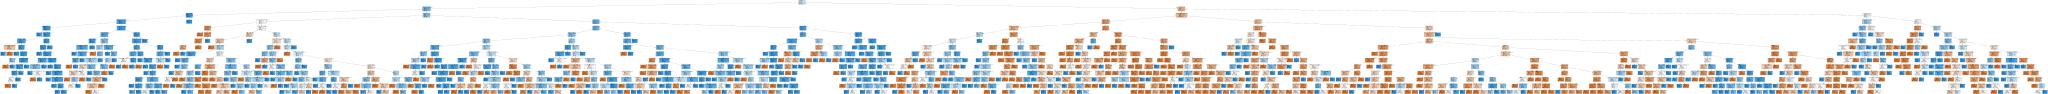

In [12]:
dot_data = tree.export_graphviz(clfPhising, out_file=None, feature_names=trainX.columns, class_names = class_labels, filled=True, rounded=False, special_characters=True)
graph = graphviz.Source(dot_data,format = 'png')
graph.render(filename='graph')
graph

# Decision Tree with AdaBoost adaption

In [13]:
#param_ada ={
#    'n_estimators': [400,500,600,700,800,900],
#    'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.],
#    'algorithm': ['SAMME', 'SAMME.R']  
#}
#cv_ada = model_selection.GridSearchCV(AdaBoostClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features= 'sqrt')),param_grid = param_ada)
#cv_ada.fit(trainX, trainY)
#print(cv_ada.best_score_)
#print(cv_ada.best_params_)

In [14]:
ada_clf_standard = AdaBoostClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features= 'sqrt'),n_estimators= 500,learning_rate=0.5,algorithm='SAMME')

In [15]:
ada_clf_standard.fit(trainX, trainY)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=500, random_state=None)

In [16]:
adaclfPred = ada_clf_standard.predict(testX)
print(classification_report(testY, adaclfPred))
print(confusion_matrix(testY, adaclfPred))
print('Accuracy score ', accuracy_score(testY, adaclfPred))
print('Precision score ', precision_score(testY, adaclfPred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       910
           1       0.95      0.96      0.95      1091

   micro avg       0.95      0.95      0.95      2001
   macro avg       0.95      0.95      0.95      2001
weighted avg       0.95      0.95      0.95      2001

[[ 852   58]
 [  44 1047]]
('Accuracy score ', 0.9490254872563718)
('Precision score ', 0.9475113122171945)


# KFold Cross Validation

In [17]:
kfold = model_selection.KFold(n_splits=10, shuffle=True)
cv_acc = []
cv_error = []
for train, test in kfold.split(np.array(phisihingData)):
    clf = AdaBoostClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features= 'sqrt'),n_estimators= 400,learning_rate=0.5,algorithm='SAMME')
    clf.fit(pd.DataFrame(phishing_attrs).loc[train], pd.DataFrame(phishing_target).loc[train])
    pred = clf.predict(pd.DataFrame(phishing_attrs).loc[test])
    scores = accuracy_score(pd.DataFrame(phishing_target).loc[test], pred)
    print("Accuracy score: %.2f%%" % (scores*100))
    cv_acc.append(scores * 100)
    cv_error.append(100-scores * 100)
print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc),np.std(cv_acc)))
print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error),np.std(cv_error)))

D:\ProgramData\Anaconda2\envs\MachineLearning2.7\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 93.41%
Accuracy score: 94.70%
Accuracy score: 94.20%
Accuracy score: 94.30%
Accuracy score: 94.80%
Accuracy score: 94.90%
Accuracy score: 94.80%
Accuracy score: 95.50%
Accuracy score: 95.00%
Accuracy score: 96.60%
Cross Validation Accuracy 94.82% (+/- 0.80%)
Cross Validation Error 5.18% (+/- 0.80%)


# Feature Selction (5 feautures)

In [18]:
model = SelectFromModel(ada_clf_standard, max_features = 5)
model.fit(trainX, trainY)
transformed = model.transform(trainX)
mask = model.get_support() #list of booleans
new_features = [] # The list of your K best features
feature_names = list(trainX.columns.values)
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
print(new_features)
trainX_new = pd.DataFrame(transformed, columns=  new_features)

['having_Sub_Domain', 'URL_of_Anchor', 'Links_in_tags', 'web_traffic', 'Links_pointing_to_page']


# Basic Decision Tree

In [19]:
#param_tree = { 
#    'criterion': ['entropy', 'gini'],
#    'splitter': ['random','best'],
#    'max_depth':[5,6,7,8,9,10,11,12,13,14,15],
#    'min_samples_split': [2,3,4,5,6,7,8,9,10],
#    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
#    'max_features': ['auto', 'sqrt', 'log2']
#}
#cv_tree = model_selection.GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features= 'sqrt'),param_grid = param_tree)
#cv_tree.fit(trainX_new, trainY)
#print(cv_tree.best_score_)
#print(cv_tree.best_params_)

In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf = 6, min_samples_split = 7, max_features= 'sqrt')
clf = clf.fit(trainX_new, trainY)

In [21]:
clfPred = clf.predict(model.transform(testX))
print(classification_report(testY, clfPred))
print(confusion_matrix(testY, clfPred))
print('Accuracy score ', accuracy_score(testY, clfPred))
print('Precision score ', precision_score(testY, clfPred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       910
           1       0.89      0.93      0.91      1091

   micro avg       0.90      0.90      0.90      2001
   macro avg       0.90      0.90      0.90      2001
weighted avg       0.90      0.90      0.90      2001

[[ 780  130]
 [  72 1019]]
('Accuracy score ', 0.8990504747626187)
('Precision score ', 0.886858137510879)


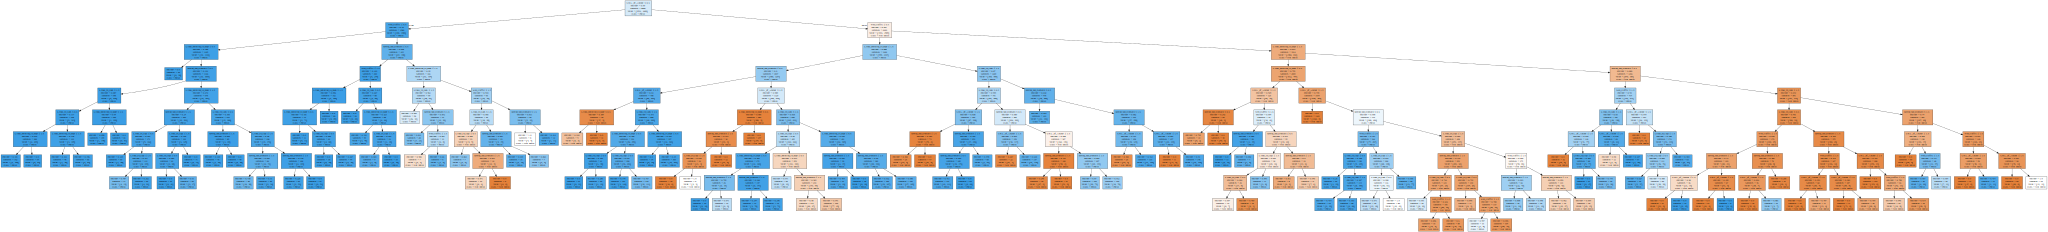

In [22]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=trainX_new.columns, class_names = class_labels, filled=True, rounded=False, special_characters=True)
graph = graphviz.Source(dot_data,format = 'png')
graph.render(filename='graph1')
graph

# Decision Tree with AdaBoost adaption

In [23]:
#param_ada ={
#    'n_estimators': [400,500,600,700,800,900],
#    'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.],
#    'algorithm': ['SAMME', 'SAMME.R']  
#}
#cv_ada = model_selection.GridSearchCV(AdaBoostClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf = 6, min_samples_split = 7, max_features= 'sqrt')),param_grid = param_ada)
#cv_ada.fit(trainX_new, trainY)
#print(cv_ada.best_score_)
#print(cv_ada.best_params_)

In [24]:
ada_clf = AdaBoostClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf = 6, min_samples_split = 7, max_features= 'sqrt'),n_estimators= 800,learning_rate=0.75,algorithm='SAMME.R')

In [25]:
ada_clf.fit(trainX_new, trainY)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.75, n_estimators=800, random_state=None)

In [26]:
adaclfPred = ada_clf.predict(model.transform(testX))
print(classification_report(testY, adaclfPred))
print(confusion_matrix(testY, adaclfPred))
print('Accuracy score ', accuracy_score(testY, adaclfPred))
print('Precision score ', precision_score(testY, adaclfPred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       910
           1       0.89      0.94      0.91      1091

   micro avg       0.90      0.90      0.90      2001
   macro avg       0.90      0.90      0.90      2001
weighted avg       0.90      0.90      0.90      2001

[[ 777  133]
 [  64 1027]]
('Accuracy score ', 0.9015492253873063)
('Precision score ', 0.8853448275862069)


# KFold Cross Validation

In [27]:
kfold = model_selection.KFold(n_splits=10, shuffle=True)
cv_acc = []
cv_error = []
for train, test in kfold.split(np.array(phisihingData)):
    clf = AdaBoostClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf = 6, min_samples_split = 7, max_features= 'sqrt'),n_estimators= 800,learning_rate=0.75,algorithm='SAMME.R')
    clf.fit(model.transform(pd.DataFrame(phishing_attrs).loc[train]), pd.DataFrame(phishing_target).loc[train])
    pred = clf.predict(model.transform(pd.DataFrame(phishing_attrs).loc[test]))
    scores = accuracy_score(pd.DataFrame(phishing_target).loc[test], pred)
    print("Accuracy score: %.2f%%" % (scores*100))
    cv_acc.append(scores * 100)
    cv_error.append(100-scores * 100)
print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc),np.std(cv_acc)))
print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error),np.std(cv_error)))

Accuracy score: 89.61%
Accuracy score: 87.40%
Accuracy score: 91.10%
Accuracy score: 90.30%
Accuracy score: 91.40%
Accuracy score: 89.40%
Accuracy score: 90.10%
Accuracy score: 90.50%
Accuracy score: 91.90%
Accuracy score: 90.00%
Cross Validation Accuracy 90.17% (+/- 1.19%)
Cross Validation Error 9.83% (+/- 1.19%)


# Feature Selction (4 feautures)

In [28]:
model = SelectFromModel(ada_clf_standard, max_features = 4)
model.fit(trainX, trainY)
transformed = model.transform(trainX)
mask = model.get_support() #list of booleans
new_features = [] # The list of your K best features
feature_names = list(trainX.columns.values)
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
print(new_features)
trainX_new = pd.DataFrame(transformed, columns=  new_features)

['having_Sub_Domain', 'URL_of_Anchor', 'Links_in_tags', 'web_traffic']


# Basic Decision Tree

In [29]:
#param_tree = { 
#    'criterion': ['entropy', 'gini'],
#    'splitter': ['random','best'],
#    'max_depth':[5,6,7,8,9,10,11,12,13,14,15],
#    'min_samples_split': [2,3,4,5,6,7,8,9,10],
#    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
#    'max_features': ['auto', 'sqrt', 'log2']
#}
#cv_tree = model_selection.GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features= 'sqrt'),param_grid = param_tree)
#cv_tree.fit(trainX_new, trainY)
#print(cv_tree.best_score_)
#print(cv_tree.best_params_)

In [30]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf = 3, min_samples_split = 2, max_features= 'sqrt')
clf = clf.fit(trainX_new, trainY)

In [31]:
clfPred = clf.predict(model.transform(testX))
print(classification_report(testY, clfPred))
print(confusion_matrix(testY, clfPred))
print('Accuracy score ', accuracy_score(testY, clfPred))
print('Precision score ', precision_score(testY, clfPred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       910
           1       0.85      0.88      0.87      1091

   micro avg       0.85      0.85      0.85      2001
   macro avg       0.85      0.85      0.85      2001
weighted avg       0.85      0.85      0.85      2001

[[745 165]
 [132 959]]
('Accuracy score ', 0.8515742128935532)
('Precision score ', 0.853202846975089)


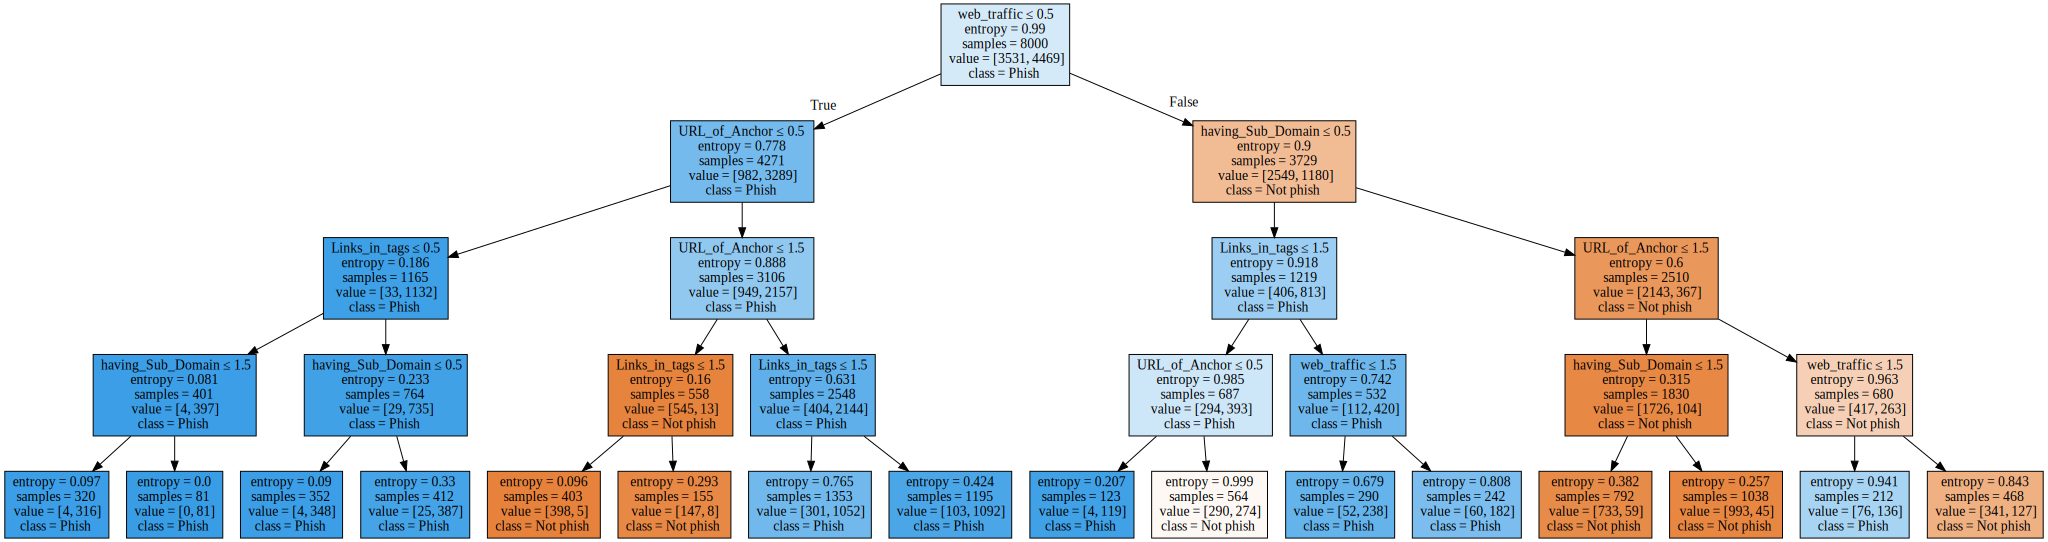

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=trainX_new.columns, class_names = class_labels, filled=True, rounded=False, special_characters=True)
graph = graphviz.Source(dot_data,format = 'png')
graph.render(filename='graph2')
graph

# Decision Tree with AdaBoost adaption

In [33]:
#param_ada ={
#    'n_estimators': [50,100,200,300,400,500],
#    'learning_rate': [0.001,0.01,0.1, 0.25],
#    'algorithm': ['SAMME', 'SAMME.R']  
#}
#cv_ada = model_selection.GridSearchCV(AdaBoostClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf = 3, min_samples_split = 2, max_features= 'sqrt')),param_grid = param_ada)
#cv_ada.fit(trainX_new, trainY)
#print(cv_ada.best_score_)
#print(cv_ada.best_params_)

In [34]:
ada_clf = AdaBoostClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf = 2, min_samples_split = 3, max_features= 'sqrt'),n_estimators= 400,learning_rate=0.01,algorithm='SAMME.R')

In [35]:
ada_clf.fit(trainX_new, trainY)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=400, random_state=None)

In [36]:
adaclfPred = ada_clf.predict(model.transform(testX))
print(classification_report(testY, adaclfPred))
print(confusion_matrix(testY, adaclfPred))
print('Accuracy score ', accuracy_score(testY, adaclfPred))
print('Precision score ', precision_score(testY, adaclfPred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       910
           1       0.87      0.95      0.91      1091

   micro avg       0.90      0.90      0.90      2001
   macro avg       0.90      0.89      0.89      2001
weighted avg       0.90      0.90      0.89      2001

[[ 753  157]
 [  52 1039]]
('Accuracy score ', 0.895552223888056)
('Precision score ', 0.8687290969899666)


# KFold Cross Validation

In [37]:
kfold = model_selection.KFold(n_splits=10, shuffle=True)
cv_acc = []
cv_error = []
for train, test in kfold.split(np.array(phisihingData)):
    clf = AdaBoostClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf = 3, min_samples_split = 2, max_features= 'sqrt'),n_estimators= 400,learning_rate=0.01,algorithm='SAMME.R')
    clf.fit(model.transform(pd.DataFrame(phishing_attrs).loc[train]), pd.DataFrame(phishing_target).loc[train])
    pred = clf.predict(model.transform(pd.DataFrame(phishing_attrs).loc[test]))
    scores = accuracy_score(pd.DataFrame(phishing_target).loc[test], pred)
    print("Accuracy score: %.2f%%" % (scores*100))
    cv_acc.append(scores * 100)
    cv_error.append(100-scores * 100)
print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc),np.std(cv_acc)))
print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error),np.std(cv_error)))

Accuracy score: 90.41%
Accuracy score: 89.00%
Accuracy score: 91.30%
Accuracy score: 89.10%
Accuracy score: 89.10%
Accuracy score: 87.70%
Accuracy score: 89.10%
Accuracy score: 89.80%
Accuracy score: 88.70%
Accuracy score: 90.20%
Cross Validation Accuracy 89.44% (+/- 0.96%)
Cross Validation Error 10.56% (+/- 0.96%)
